In [1]:
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import rcParams, cm
from scipy import signal

## Carregamento dos dados para topicos_cc

### Tipos de Movimentos
- Flexão de punho (fechar a mão);
- Extensão de punho (abrir a mão);
- Pinça (segurar objeto pequeno);
- Segurar cartão;
- Segurar caneta;
- Segurar esfera;
- Segurar copo;
- Gancho (segurar objeto com alça).

In [2]:
num_subjects = 10  # quantidade de voluntários
num_trials = 3     # quantidade de tentativas
num_classes = 8    # quantidade de tipos diferentes de movimentos
num_channels = 4   # quantidade de canais/eletrodos
num_samples = 1600 # quantidade de amostras

data = np.empty((num_subjects, num_trials, num_classes, num_channels, num_samples)) # 10,3,8,4,1600

# Carregar os dados para cada pessoa
for subject_id in range(1, num_subjects + 1):
        
    # Carregar os dados das três tentativas
    for trial_id in range(1, num_trials + 1):
        
        file_path = f'./sEMG/datasets/topicos_cc/s{subject_id:02d}_{trial_id}.npy'
        
        loaded_data = np.load(file_path)              # shape (8,1600,4)
        loaded_data = np.moveaxis(loaded_data, 1, -1) # shape (8,4,1600)
        
        data[subject_id - 1, trial_id-1,:, :, :] = loaded_data
                        
print(f'{data.shape} - (voluntarios, classes, ensaios, canais, linhas)')

(10, 3, 8, 4, 1600) - (voluntarios, classes, ensaios, canais, linhas)


## Definição e aplicação do Filtro

In [3]:
def butter_bandpass(data, lowcut, highcut, fs=200, order=4):
    nyq = fs * 0.5
    low = lowcut / nyq
    high = highcut / nyq
    b, a = signal.butter(order, [low, high], btype='bandpass')
    return signal.filtfilt(b, a, data)
                                
# reshaped_data = np.reshape(data, (-1, num_samples)) 

filtered_data = butter_bandpass(data, lowcut=5, highcut=50)

data = np.reshape(filtered_data, (num_subjects, num_trials, num_classes, num_channels, num_samples))

## Visualização dos dados

### Mesma classe, diferentes trials

Visualização dos dados em 2d

Para esse exemplo foi passado a classe **5**, voluntário **7** e foram considerados os trials de **1 a 3**. O trial 1 é o que mais se diferenciou.

Para o voluntário **6**, classe **5** e trial de **1 a 3** o trial 2 foi o que mais se diferenciou.

Para o voluntário **3**, classe **5** e trial de **1 a 3** o trial 1 foi o que mais se diferenciou.

Para o voluntário **8**, classe **5** e trial de **1 a 3** o trial 1 foi o que mais se diferenciou. Os três trials se assemelham minimamente. Sendo que o trial **1 e 2** são os que mais se assemelham.

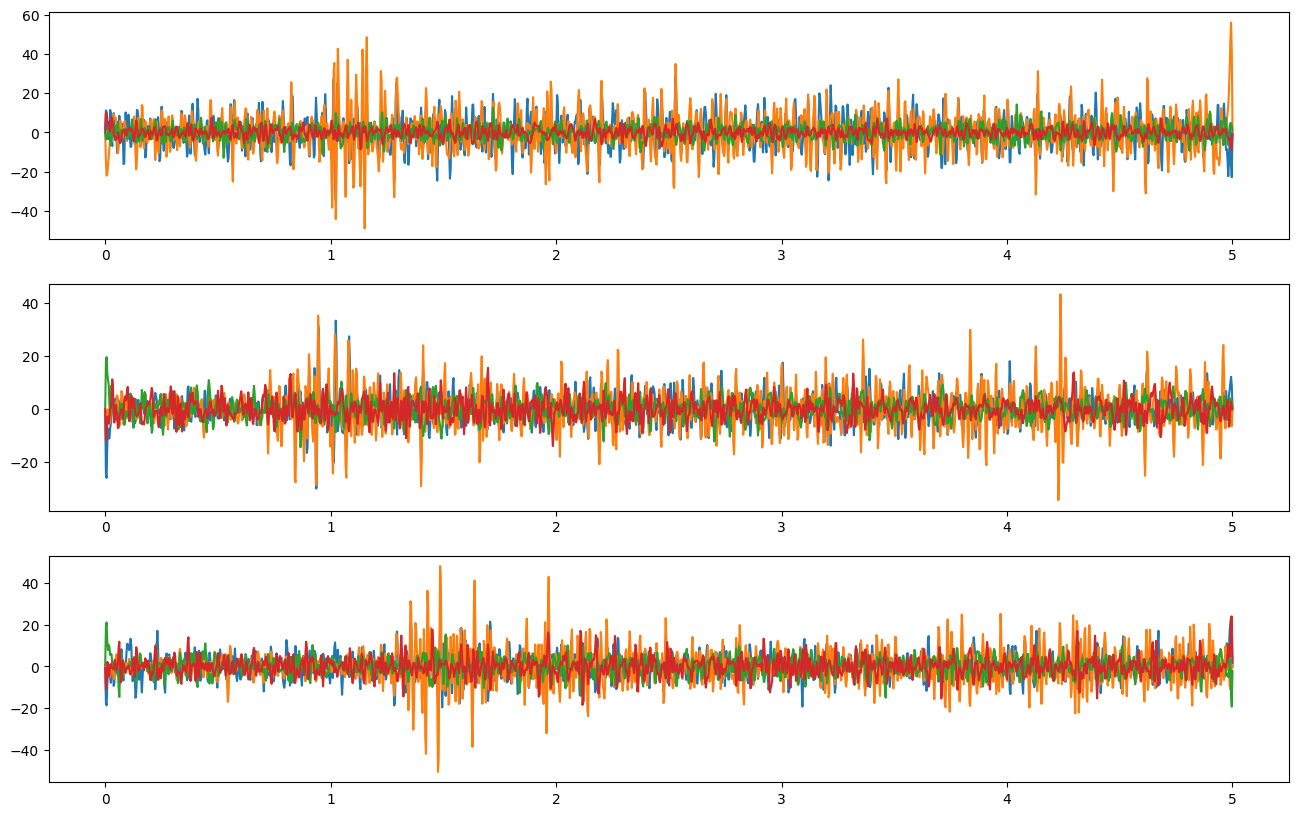

In [17]:
num_voluntario = 8 # 1...10
classe = 5 # 1...8

# trial 1
d1 = data[num_voluntario - 1,0,classe - 1,0,:], data[num_voluntario - 1,0,classe - 1,1,:], data[num_voluntario - 1,0,classe - 1,2,:], data[num_voluntario - 1,0,classe - 1,3,:]

# trial 2
d2 = data[num_voluntario - 1,1,classe - 1,0,:], data[num_voluntario - 1,1,classe - 1,1,:], data[num_voluntario - 1,1,classe - 1,2,:], data[num_voluntario - 1,1,classe - 1,3,:]

# trial 3
d3 = data[num_voluntario - 1,2,classe - 1,0,:], data[num_voluntario - 1,2,classe - 1,1,:], data[num_voluntario - 1,2,classe - 1,2,:], data[num_voluntario - 1,2,classe - 1,3,:]

rcParams['figure.figsize'] = [16., 10.]

x = np.linspace(0, 5, num_samples)
fig, ax = plt.subplots(3, 1)

ax[0].plot(x, d1[0])
ax[0].plot(x, d1[1])
ax[0].plot(x, d1[2])
ax[0].plot(x, d1[3])

ax[1].plot(x, d2[0])
ax[1].plot(x, d2[1])
ax[1].plot(x, d2[2])
ax[1].plot(x, d2[3])

ax[2].plot(x, d3[0])
ax[2].plot(x, d3[1])
ax[2].plot(x, d3[2])
ax[2].plot(x, d3[3])

plt.show()

Visualização dos dados em 3d

Para esse exemplo foi passado a classe **5**, voluntário **7** e foram considerados os trials de **1 a 3**.

Como é possível observar, os trials **2 e 3** são parecidos. O trial **1** se difere bastante dos outros.

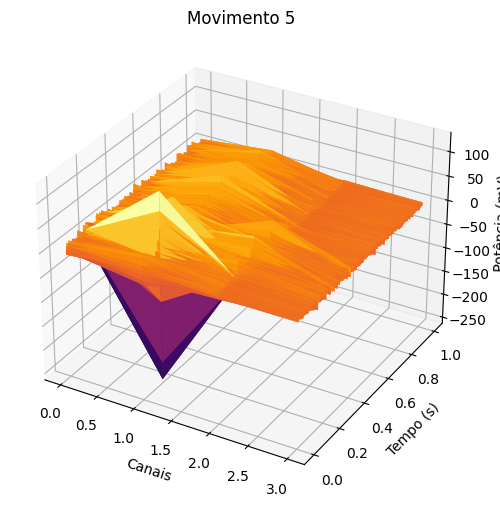

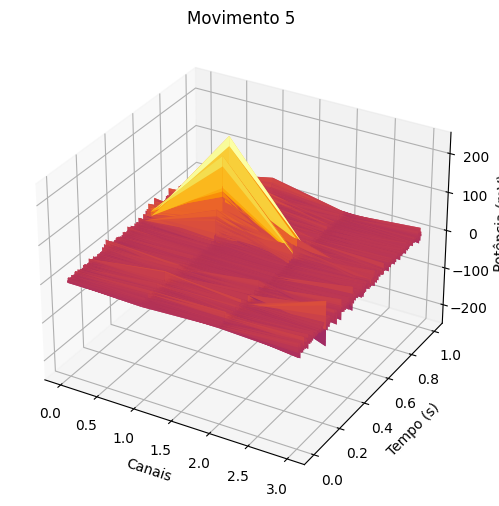

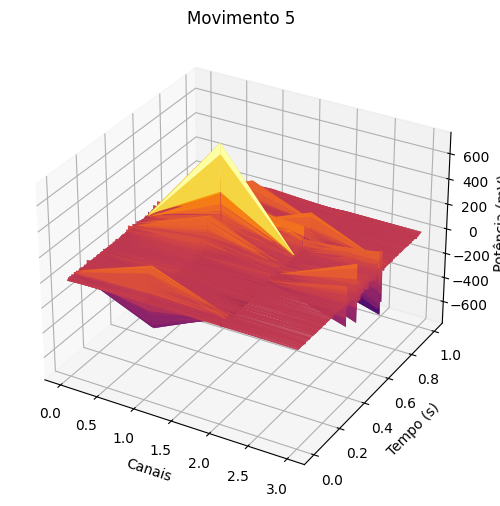

In [5]:
rcParams['figure.figsize'] = [18., 6.]

num_voluntario = 7 # 1...10
num_classe = 5 # 1...8

for trial in range(3):
    plot_data = []
    for channel in range(4):
        
        # espaço de 1600 pontos entre 0 e 1
        for i, t in enumerate(np.linspace(0, 1, 1600)):
            if i < num_samples: 
                plot_data.append([channel, t, data[num_voluntario - 1][trial][num_classe - 1][channel][i]])

    plot_data = np.array(plot_data)
    x, y, z = plot_data[:,0], plot_data[:,1], plot_data[:,2] 
    ax = plt.axes(projection ='3d')
    ax.set_title('Movimento {}'.format(num_classe))
    ax.set_xlabel('Canais')
    ax.set_ylabel('Tempo (s)')
    ax.set_zlabel('Potência (mV)')
    ax.plot_trisurf(x, y, z, antialiased=True, cmap=cm.inferno, linewidth=1)
    plt.show()

### Diferentes classes, mesmo trials

Visualização dos dados em 2d

Para esse exemplo foi passado as classes **1,5 e 8** do voluntário **7** e foi considerado o trial de número **1**. As classes **1** e **8** são parecidas mas a classe **5** é a que mais se diferencia.

Para o segundo exemplo foram consideradas as classes **2**, **4** e **8** do voluntário 7 e foi considerado o trial de número **2**. As 3 classes se diferenciam bastante.

Para o terceiro exemplo foram consideradas as classes **1**, **5** e **8** do voluntário 2 e foi considerado o trial de número **2**. As 3 se diferenciaram bastante.

Por fim, foi utilizado as classes **2**, **3** e **4** do voluntário **2** e foi considerado o trial de número **2**. O resultado gerou visualizações que se diferenciaram bastante.

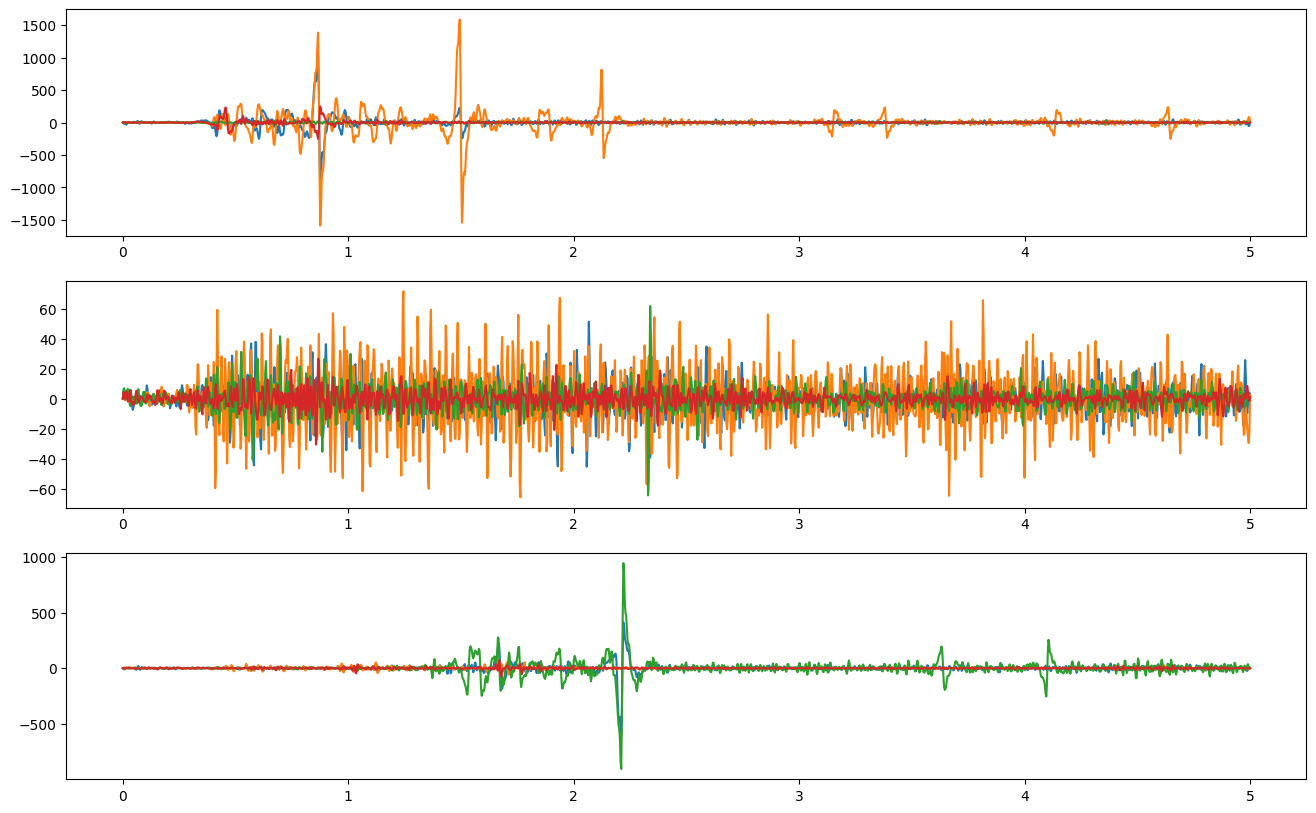

In [21]:
num_voluntario = 2 # 1...10
trial = 2 # 1...3
 
num_classe_1 = 2 # 1...8
num_classe_2 = 3 # 1...8
num_classe_3 = 4 # 1...8

d1 = data[num_voluntario - 1,trial - 1,num_classe_1 - 1,0,:], data[num_voluntario - 1,trial - 1,num_classe_1 - 1,1,:], data[num_voluntario - 1,trial - 1,num_classe_1 - 1,2,:], data[num_voluntario - 1,trial - 1,num_classe_1 - 1,3,:]

d2 = data[num_voluntario - 1,trial - 1,num_classe_2 - 1,0,:], data[num_voluntario - 1,trial - 1,num_classe_2 - 1,1,:], data[num_voluntario - 1,trial - 1,num_classe_2 - 1,2,:], data[num_voluntario - 1,trial - 1,num_classe_2 - 1,3,:]

d3 = data[num_voluntario - 1,trial - 1,num_classe_3 - 1,0,:], data[num_voluntario - 1,trial - 1,num_classe_3 - 1,1,:], data[num_voluntario - 1,trial - 1,num_classe_3 - 1,2,:], data[num_voluntario - 1,trial - 1,num_classe_3 - 1,3,:]

rcParams['figure.figsize'] = [16., 10.]

x = np.linspace(0, 5, num_samples)
fig, ax = plt.subplots(3, 1)

ax[0].plot(x, d1[0])
ax[0].plot(x, d1[1])
ax[0].plot(x, d1[2])
ax[0].plot(x, d1[3])

ax[1].plot(x, d2[0])
ax[1].plot(x, d2[1])
ax[1].plot(x, d2[2])
ax[1].plot(x, d2[3])

ax[2].plot(x, d3[0])
ax[2].plot(x, d3[1])
ax[2].plot(x, d3[2])
ax[2].plot(x, d3[3])

plt.show()

Visualização dos dados em 3d

Para esse exemplo foi passado o trial **1** de todas as classes do voluntário **7**. As classes 6, 7 e 8 ficaram parecidas.

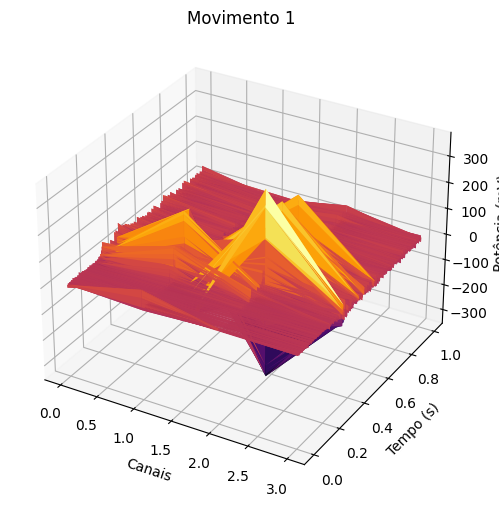

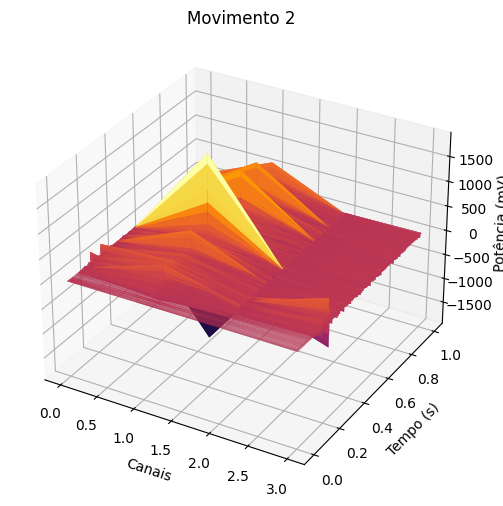

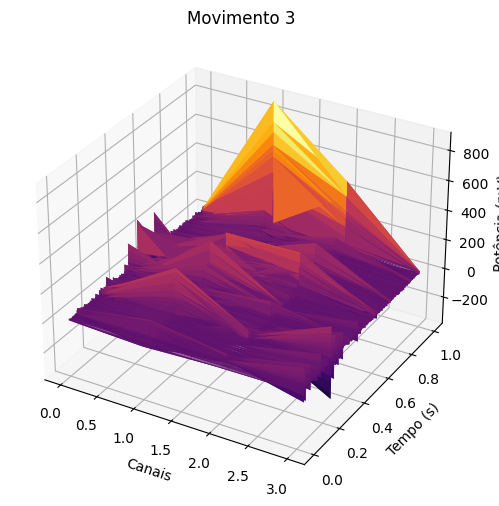

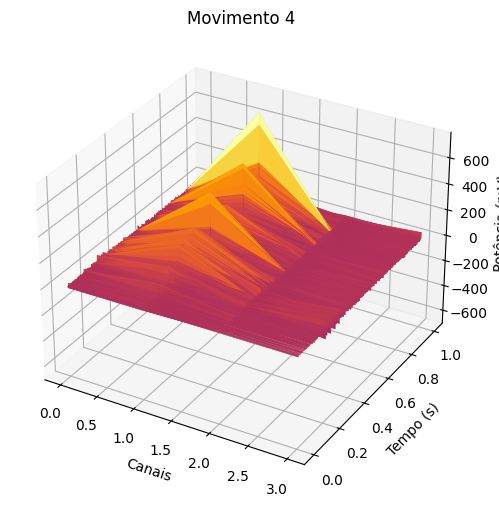

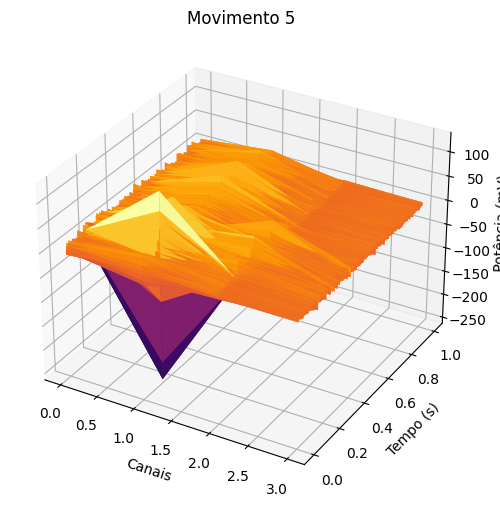

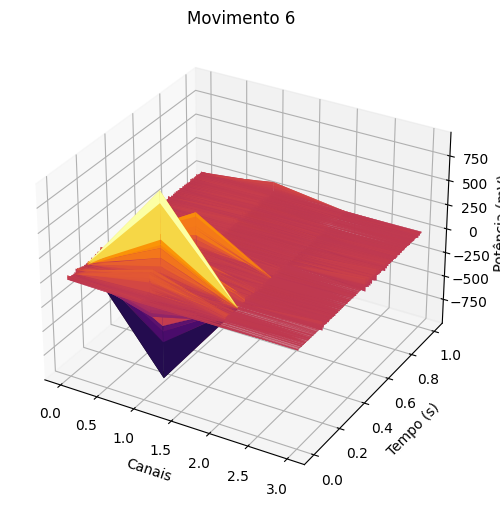

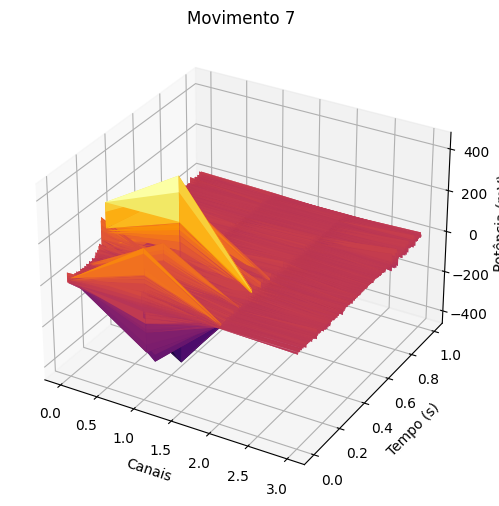

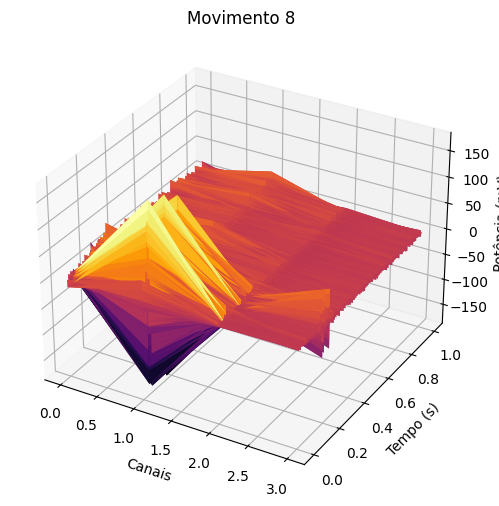

In [15]:
rcParams['figure.figsize'] = [18., 6.]

num_voluntario = 7
trial = 1 

for mov in range(8):
    plot_data = []
    for channel in range(4):
        
        # espaço de 1600 pontos entre 0 e 1
        for i, t in enumerate(np.linspace(0, 1, 1600)):
            if i < num_samples: 
                plot_data.append([channel, t, data[num_voluntario - 1][trial - 1][mov][channel][i]])
            
    plot_data = np.array(plot_data)
    x, y, z = plot_data[:,0], plot_data[:,1], plot_data[:,2]
    ax = plt.axes(projection ='3d')
    ax.set_title('Movimento {}'.format(mov + 1))
    ax.set_xlabel('Canais')
    ax.set_ylabel('Tempo (s)')
    ax.set_zlabel('Potência (mV)')
    ax.plot_trisurf(x, y, z, antialiased=True, cmap=cm.inferno, linewidth=1)
    plt.show()